This is a notebook for plotting the development of the prominence of the rhythm of a bee and the share of beeing circadian over different age groups.

# Imports

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
import matplotlib
import datetime
import pytz
import matplotlib.dates as mdates
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
from matplotlib.patches import Patch
from matplotlib import ticker
import numpy as np

import bb_rhythm.plotting
import bb_rhythm.utils

# Plot Figure 2

## 2019

### Prepare and read data

In [3]:
# cosinor fit data for period 2019
df_2019 = pd.read_pickle("../data/dataframes/circadianess_2019/cosinor_3600.pkl")

# define bees beeing circadian with results of zero amplitude test beeing < 0.05
df_2019["is_circadian"] = df_2019.p_value < 0.05
df_2019["is_good_fit"] = ((df_2019.p_hom > 0.05) & (df_2019.dw > 1.0) & (df_2019.ad_fuller < 0.05) & (df_2019.p_ks > 0.05) & (df_2019.p_reject > 0.05))

In [4]:
# movement speeds
velocity_df_2019 = pd.read_pickle("../data/dataframes/velocity_weather_over_time_2019/velocity_mean_10min_all_bb2019_bayesian_bees.pkl")
velocities_young = pd.read_pickle("../../plots/5101.pkl")
velocities_old = pd.read_pickle("../../plots/2088.pkl")

In [5]:
# define age groups of bees and create bins accordingly
binning = bb_rhythm.utils.Binning(bin_name="Age [days]", bin_parameter="age")
df_2019_plt = binning.add_bins_to_df(df_2019.dropna(), bins=[0, 4, 9, 14, 19, 24, 29, 34], step_size=None)
# add age bins
binning = bb_rhythm.utils.Binning(bin_name="Age [days]", bin_parameter="age")
velocity_df_2019 = binning.add_bins_to_df(velocity_df_2019, bins=[0, 4, 9, 14, 19, 24, 29, 34])

# create color palette
palette = bb_rhythm.plotting.create_age_color_palette(
        sorted(df_2019_plt["Age [days]"].unique()), "Age [days]", df_2019_plt
    )
day = datetime.datetime(2019, 9, 12, 12, tzinfo=pytz.utc)

# set time and subset
dt_from = pd.to_datetime(datetime.datetime(2019, 9, 11), utc=True)
dt_to = pd.to_datetime(datetime.datetime(2019, 9, 14), utc=True)
velocity_df_2019_subperiod = velocity_df_2019[((velocity_df_2019["date"] >= dt_from)
        & (velocity_df_2019["date"] < dt_to))]

# get velocity young data
velocities_young["datetime"] = velocities_young["datetime"].dt.round("%ss" % 3600)
velocities_young_median = velocities_young.groupby(["datetime"])[["velocity", "time_passed"]].median().reset_index()
A_young = df_2019[(df_2019.bee_id == 5101) & (df_2019.date == day)].amplitude.values[0]
P_young = df_2019[(df_2019.bee_id == 5101) & (df_2019.date == day)].phase.values[0]
M_young = df_2019[(df_2019.bee_id == 5101) & (df_2019.date == day)].mesor.values[0]
x_young = np.array([t.total_seconds() for t in velocities_young.datetime - day])
y_young = A_young*np.cos(x_young-P_young) + M_young

# get velocity old data
velocities_old["datetime"] = velocities_old["datetime"].dt.round("%ss" % 3600)
velocities_old_median = velocities_old.groupby(["datetime"])[["velocity", "time_passed"]].median().reset_index()
A_old = df_2019[(df_2019.bee_id == 2088) & (df_2019.date == day)].amplitude.values[0]
P_old = df_2019[(df_2019.bee_id == 2088) & (df_2019.date == day)].phase.values[0]
M_old = df_2019[(df_2019.bee_id == 2088) & (df_2019.date == day)].mesor.values[0]
x_old = np.array([t.total_seconds() for t in velocities_old.datetime - day])
y_old = A_old*np.cos(x_old-P_old) + M_old

/home/julia/arbeit/hiveopolis/bb_rhythm/bb_rhythm/utils.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[self.bin_name] = [self.bin_labels[item] for item in self.bins]
/home/julia/arbeit/hiveopolis/bb_rhythm/bb_rhythm/utils.py:128: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=[self.bin_name], inplace=True)


/home/julia/arbeit/hiveopolis/bb_rhythm/bb_rhythm/plotting.py:228: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_age_velocity_df["velocity_smoothed"] = time_age_velocity_df["velocity"]
/home/julia/arbeit/hiveopolis/bb_rhythm/bb_rhythm/plotting.py:230: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_age_velocity_df["velocity_smoothed"][
/home/julia/arbeit/hiveopolis/bb_rhythm/bb_rhythm/plotting.py:230: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/

<Figure size 640x480 with 0 Axes>

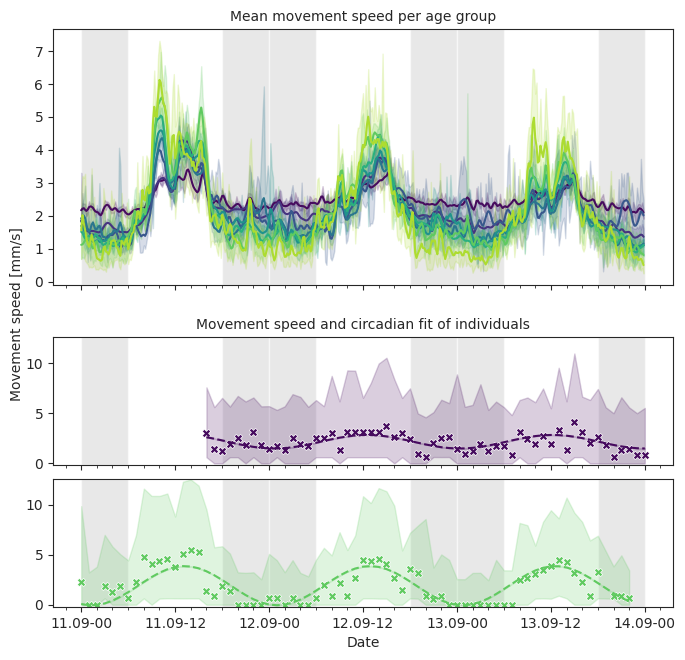

In [14]:
sns.set_style("ticks")
sns.despine()
# A
fig, ax = plt.subplots(4, 1, figsize=(8, 7.5), sharex=True, gridspec_kw={'height_ratios': [0.5, 0.05, 0.25, 0.25], 'hspace': 0.1})

ax[1].set_visible(False)

bb_rhythm.plotting.add_grey_nighttime_bars(ax[0], velocity_df_2019_subperiod)
bb_rhythm.plotting.plot_smoothed_age_velocity_over_time(ax[0], palette, "Age [days]", velocity_df_2019_subperiod, hue_order=sorted(df_2019_plt["Age [days]"].unique()))

# add grey nighttimes
bb_rhythm.plotting.add_grey_nighttime_bars(ax[2], velocity_df_2019_subperiod)
# plot cosinor fit
sns.lineplot(x=velocities_young.datetime.values, y=y_young, c=palette[0], label="Cosinor model", ax=ax[2], linestyle="--")
# plot 95% percentile velocities
sns.lineplot(
      data=velocities_young, x="datetime", y="velocity",
      errorbar=("pi", 90),
      color=palette[0], ax=ax[2], label="Movement speed", estimator="median", linewidth=0,
)
# plot median velocities
sns.scatterplot(velocities_young_median, x="datetime", y="velocity", c=palette[0], marker="X", ax=ax[2], label="Median movement\nspeed per h")

# add grey nightimes
bb_rhythm.plotting.add_grey_nighttime_bars(ax[3], velocity_df_2019_subperiod)
# plot cosinor fit
sns.lineplot(x=velocities_old.datetime.values, y=y_old, color=palette[6], label="Cosinor model", ax=ax[3], linestyle="--")
# # plot 95% percentile velocities
sns.lineplot(     
     data=velocities_old, x="datetime", y="velocity",
      errorbar=("pi", 90),
      color=palette[6], ax=ax[3], label="Movement speed", estimator="median", linewidth=0,
 )
# # plot median velocities
sns.scatterplot(velocities_old_median, x="datetime", y="velocity", color=palette[6], marker="X", ax=ax[3], label="Median movement\nspeed per h")

date_form = matplotlib.dates.DateFormatter("%d.%m-%H")
ax[3].xaxis.set_major_formatter(date_form)
ax[2].set_ylim(0.0, 7)
ax[2].set_ylim(-0.2, 12.6)
ax[3].set_ylim(-0.2, 12.6)
ax[0].legend().remove()
ax[2].legend().remove()
ax[3].legend().remove()
ax[0].set_ylabel("")
ax[3].set_ylabel("")
ax[2].set_ylabel("")
ax[3].set_xlabel("Date")
ax[2].set_title("Movement speed and circadian fit of individuals", fontsize=rcParams['axes.labelsize'])
ax[0].set_title("Mean movement speed per age group", fontsize=rcParams['axes.labelsize'])
ax[3].xaxis.set_minor_locator(mdates.HourLocator(byhour=[2, 4, 6, 8, 10, 14, 16, 18, 20, 22]))
ax[3].tick_params(which='minor', length=2)
#ax[0].yaxis.set_major_locator(ticker.MultipleLocator(5))
ax[2].yaxis.set_major_locator(ticker.MultipleLocator(5))
ax[3].yaxis.set_major_locator(ticker.MultipleLocator(5))
#ax[3].grid(visible=True)
#ax[0].grid(visible=True)
#ax[2].grid(visible=True)
fig.text(0.08, 0.5, 'Movement speed [mm/s]', va='center', ha='center', fontsize=rcParams['axes.labelsize'], rotation='vertical')
plt.tight_layout()

In [27]:
# bar plot frame
df_bar = df_2019_plt.groupby(["Age [days]"]).agg(
     no=("is_circadian", lambda x: 100),
     yes=("is_circadian", lambda x: x.sum() / x.count() * 100),
).rename(columns={"yes": "Circadian", "no": "Non-circadian"}).reset_index()

/home/julia/arbeit/hiveopolis/bb_rhythm/bb_rhythm/plotting.py:241: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_age_velocity_df["velocity_smoothed"] = time_age_velocity_df["velocity"]
/home/julia/arbeit/hiveopolis/bb_rhythm/bb_rhythm/plotting.py:243: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_age_velocity_df["velocity_smoothed"][
/home/julia/arbeit/hiveopolis/bb_rhythm/bb_rhythm/plotting.py:243: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/

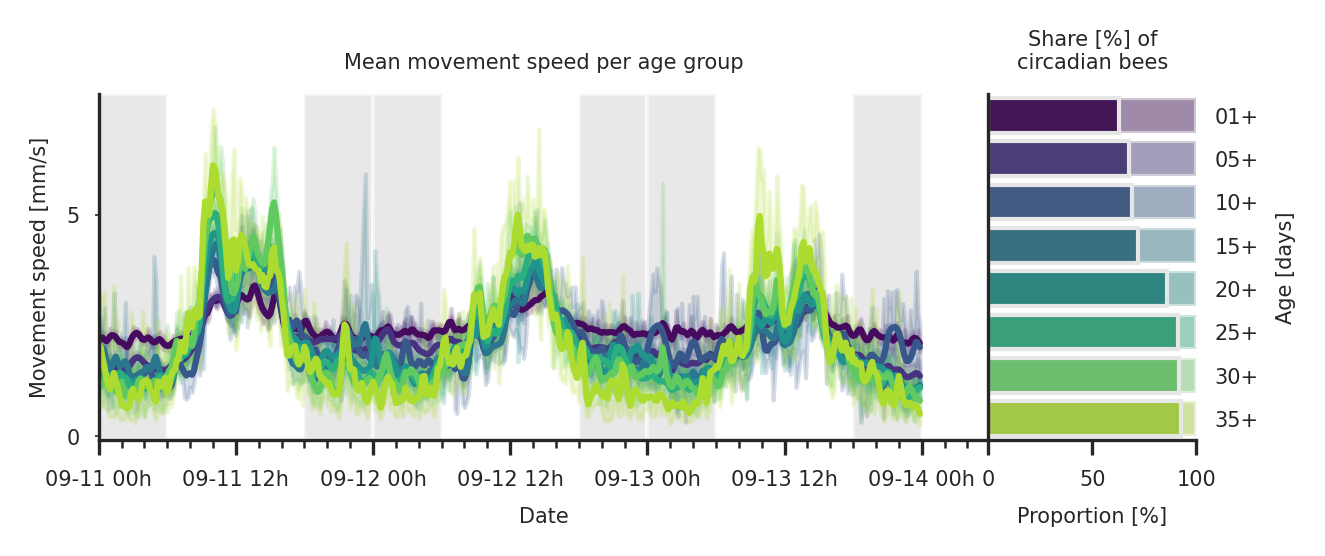

In [62]:
sns.set_style("ticks")
matplotlib.rcParams.update({'font.size': 5, 'ytick.major.size': 1,
                                'ytick.major.width': 0.4, 'font.sans-serif': 'Arial'})

# A
fig, ax = plt.subplots(1, 2, figsize=(4.72, 1.5), gridspec_kw={'width_ratios': [7.5, 1.75], 'wspace': 0.00}, dpi=300)

bb_rhythm.plotting.add_grey_nighttime_bars(ax[0], velocity_df_2019_subperiod)
bb_rhythm.plotting.plot_smoothed_age_velocity_over_time(ax[0], palette, "Age [days]", velocity_df_2019_subperiod, hue_order=sorted(df_2019_plt["Age [days]"].unique()))
ax[0].set_xlim(velocity_df_2019_subperiod.date.min(), velocity_df_2019_subperiod.date.max() + datetime.timedelta(hours=6))

# barplot
sns.barplot(data=df_bar, y="Age [days]", x="Non-circadian", ax=ax[1], palette=palette, order=sorted(df_2019_plt["Age [days]"].unique()), alpha=0.5)
sns.barplot(data=df_bar, y="Age [days]", x="Circadian", ax=ax[1], palette=palette, order=sorted(df_2019_plt["Age [days]"].unique()), edgecolor=".9")
ax[1].set_xlabel("Proportion [%]")
ax[1].set_xlim(0, 100.0)
ax[1].set_title("Share [%] of\ncircadian bees", fontsize=rcParams['axes.labelsize'])
sns.despine(ax=ax[1])
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].tick_params(right=False)
ax[1].grid(False)
ax[1].tick_params(bottom=True)

date_form = matplotlib.dates.DateFormatter("%m-%d %Hh")
ax[0].xaxis.set_major_formatter(date_form)
ax[0].legend().remove()
ax[0].set_ylabel('Movement speed [mm/s]')
ax[0].set_xlabel("Date")
ax[0].set_title("Mean movement speed per age group", fontsize=rcParams['axes.labelsize'])
ax[0].xaxis.set_minor_locator(mdates.HourLocator(byhour=[2, 4, 6, 8, 10, 14, 16, 18, 20, 22]))
ax[0].tick_params(which='minor', length=2)
ax[0].yaxis.set_major_locator(ticker.MultipleLocator(5))
sns.despine()
plt.savefig("plot_1_a.svg")

/home/julia/.local/share/virtualenvs/diurnal_rhythm_paper-zh8zkZvR/lib/python3.8/site-packages/seaborn/relational.py:573: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  points = ax.scatter(x=x, y=y, **kws)
/tmp/ipykernel_8183/2953512812.py:66: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic fami

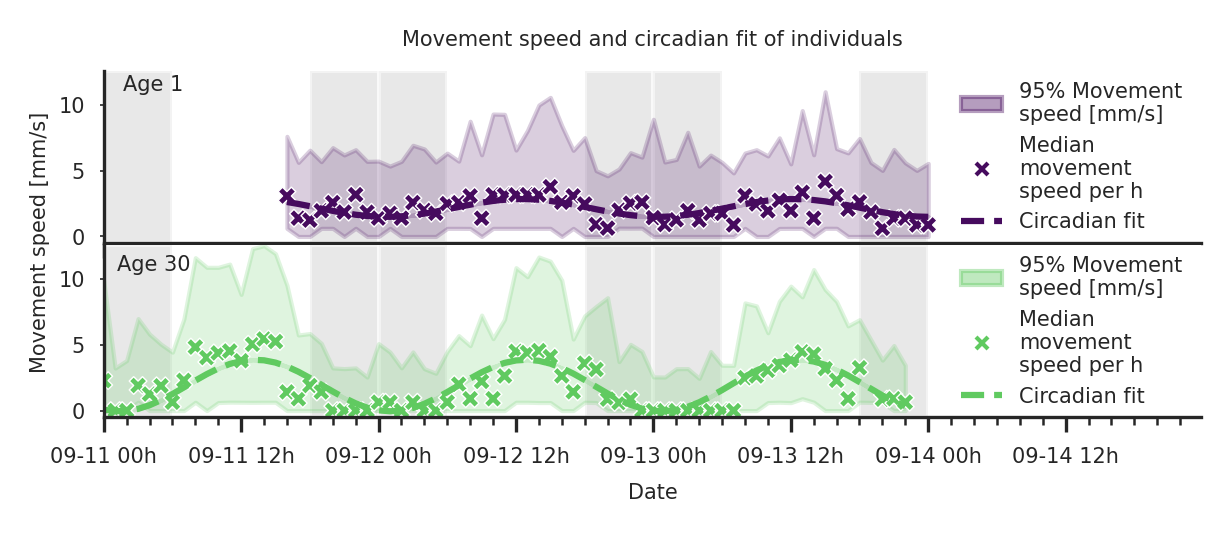

In [63]:
sns.set_style("ticks")
matplotlib.rcParams.update({'font.size': 5, 'ytick.major.size': 1,
                                'ytick.major.width': 0.4, 'font.sans-serif': 'Arial'})

# A
fig, ax = plt.subplots(2, 1, figsize=(4.72, 1.5), gridspec_kw={'height_ratios': [0.5, 0.5], 'hspace': 0.01}, sharex=True, dpi=300)

# add grey nighttimes
bb_rhythm.plotting.add_grey_nighttime_bars(ax[0], velocity_df_2019_subperiod)
# plot cosinor fit
sns.lineplot(x=velocities_young.datetime.values, y=y_young, c=palette[0], label="Cosinor model", ax=ax[0], linestyle="--")
# plot 95% percentile velocities
sns.lineplot(
      data=velocities_young, x="datetime", y="velocity",
      errorbar=("pi", 90),
      color=palette[0], ax=ax[0], label="Movement speed", estimator="median", linewidth=0,
)
# plot median velocities
sns.scatterplot(velocities_young_median, x="datetime", y="velocity", c=palette[0], marker="X", size=0.75, ax=ax[0], label="Median movement\nspeed per h")

# add grey nightimes
bb_rhythm.plotting.add_grey_nighttime_bars(ax[1], velocity_df_2019_subperiod)
# plot cosinor fit
sns.lineplot(x=velocities_old.datetime.values, y=y_old, color=palette[6], label="Cosinor model", ax=ax[1], linestyle="--")
# plot 95% percentile velocities
sns.lineplot(     
     data=velocities_old, x="datetime", y="velocity",
      errorbar=("pi", 90),
      color=palette[6], ax=ax[1], label="Movement speed", estimator="median", linewidth=0,
 )
# plot median velocities
sns.scatterplot(velocities_old_median, x="datetime", y="velocity", color=palette[6], marker="X", size=0.75, ax=ax[1], label="Median movement\nspeed per h")

date_form = matplotlib.dates.DateFormatter("%m-%d %Hh")
ax[1].xaxis.set_major_formatter(date_form)
ax[0].set_ylim(-0.5, 12.6)
ax[1].set_ylim(-0.5, 12.6)
ax[0].set_xlim(velocity_df_2019_subperiod.date.min(), velocity_df_2019_subperiod.date.max() + datetime.timedelta(days=1))
ax[1].set_xlim(velocity_df_2019_subperiod.date.min(), velocity_df_2019_subperiod.date.max() + datetime.timedelta(days=1))
ax[1].set_ylabel("")
ax[0].set_ylabel("")
ax[1].set_xlabel("Date")
ax[0].set_title("Movement speed and circadian fit of individuals", fontsize=rcParams['axes.labelsize'])
ax[1].xaxis.set_minor_locator(mdates.HourLocator(byhour=[2, 4, 6, 8, 10, 14, 16, 18, 20, 22]))
ax[1].tick_params(which='minor', length=2)
ax[0].yaxis.set_major_locator(ticker.MultipleLocator(5))
ax[1].yaxis.set_major_locator(ticker.MultipleLocator(5))

legends = [
    (mpatches.Patch(color=palette[0], alpha=0.4), '95% Movement\nspeed [mm/s]'), 
    ((mlines.Line2D([], [], color=palette[0], marker='x', linewidth=0, markersize=3)), "Median\nmovement\nspeed per h"), 
    ((mlines.Line2D([], [], color=palette[0], linestyle='--')), 'Circadian fit'), 
]
leg = ax[0].legend(*zip(*legends), loc='right', frameon=False)

legends = [ 
    (mpatches.Patch(color=palette[6], alpha=0.4), '95% Movement\nspeed [mm/s]'), 
    ((mlines.Line2D([], [], color=palette[6], marker='x', linewidth=0, markersize=3)), "Median\nmovement\nspeed per h"), 
    ((mlines.Line2D([], [], color=palette[6], linestyle='--')), 'Circadian fit'),
]
leg = ax[1].legend(*zip(*legends), loc='right', frameon=False)
fig.text(0.16, 0.85, 'Age 1', va='center', ha='center', fontsize=rcParams['axes.labelsize'])
fig.text(0.16, 0.45, 'Age 30', va='center', ha='center', fontsize=rcParams['axes.labelsize'])
fig.text(0.08, 0.5, 'Movement speed [mm/s]', va='center', ha='center', fontsize=rcParams['axes.labelsize'], rotation='vertical')
sns.despine()
plt.tight_layout()
plt.savefig("plot_1_b.svg")

In [177]:
import matplotlib as mpl

def style_legend_titles_by_setting_position(leg: mpl.legend.Legend, bold: bool = False) -> None:
    """ Style legend "titles"

    A legend entry can be marked as a title by setting visible=False. Titles
    get left-aligned and optionally bolded.
    """
    # matplotlib.offsetbox.HPacker unconditionally adds a pixel of padding
    # around each child.
    hpacker_padding = 1

    for handle, label in zip(leg.legendHandles, leg.texts):
        if not handle.get_visible():
            # See matplotlib.legend.Legend._init_legend_box()
            widths = [leg.handlelength, leg.handletextpad]
            offset_points = sum(leg._fontsize * w for w in widths)
            offset_pixels = leg.figure.canvas.get_renderer().points_to_pixels(offset_points) #+ hpacker_padding
            label.set_position((-offset_pixels, -0.5))
            if bold:
                label.set_fontweight('bold')

In [7]:
# bar plot frame
df_bar = df_2019_plt.groupby(["Age [days]"]).agg(
     no=("is_circadian", lambda x: 100),
     yes=("is_circadian", lambda x: x.sum() / x.count() * 100),
).rename(columns={"yes": "Circadian", "no": "Non-circadian"}).reset_index()

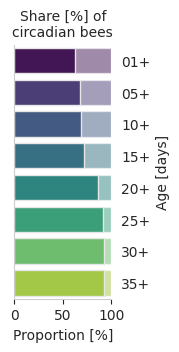

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(1.25, 3.3))
sns.barplot(data=df_bar, y="Age [days]", x="Non-circadian", ax=ax, palette=palette, order=sorted(df_2019_plt["Age [days]"].unique()), alpha=0.5)
sns.barplot(data=df_bar, y="Age [days]", x="Circadian", ax=ax, palette=palette, order=sorted(df_2019_plt["Age [days]"].unique()), edgecolor=".9")
ax.set_xlabel("Proportion [%]")
ax.set_xlim(0, 100.0)
ax.set_title("Share [%] of\ncircadian bees", fontsize=rcParams['axes.labelsize'])
sns.despine()
ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()
ax.set_facecolor('white')
ax.tick_params(right=False)
ax.grid(False)
ax.tick_params(bottom=True)

NameError: name 'style_legend_titles_by_setting_position' is not defined

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

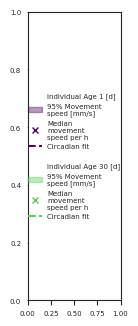

In [46]:
fig, ax = plt.subplots(1, 1, figsize=(1.2, 3.75))
legends = [
    (Patch(visible=False), 'Individual Age 1 [d]'), 
    (mpatches.Patch(color=palette[0], alpha=0.4), '95% Movement\nspeed [mm/s]'), 
    ((mlines.Line2D([], [], color=palette[0], marker='x', linewidth=0, markersize=5)), "Median\nmovement\nspeed per h"), 
    ((mlines.Line2D([], [], color=palette[0], linestyle='--')), 'Circadian fit'), 
    (Patch(visible=False), ''), (Patch(visible=False), 'Individual Age 30 [d]'), 
    (mpatches.Patch(color=palette[6], alpha=0.4), '95% Movement\nspeed [mm/s]'), 
    ((mlines.Line2D([], [], color=palette[6], marker='x', linewidth=0, markersize=5)), "Median\nmovement\nspeed per h"), 
    ((mlines.Line2D([], [], color=palette[6], linestyle='--')), 'Circadian fit'),
]
leg = ax.legend(*zip(*legends), loc='center', frameon=False)
style_legend_titles_by_setting_position(leg, bold=True)
ax.axis("off")

In [64]:
dist = pd.read_pickle("../../plots/pivot_dist_plot.pkl")
dist.columns = dist.columns.map(lambda x: x[0] + "_" + x[1] if len(x[1]) > 0 else x[0])

In [65]:
dist["x_pos_start_focal"] = dist["x_pos_start_focal"].round()
dist["y_pos_start_focal"] = dist["y_pos_start_focal"].round()
dist["phase_focal_q"] = 100 - pd.cut(dist["phase_focal_median"],
                                     pd.qcut(dist["phase_focal_median"].unique(), 100, labels=False, duplicates="drop",
                                             retbins=True)[1], labels=False)
dist["phase_focal_std_q"] = 100 - pd.cut(dist["phase_focal_std"],
                                         pd.qcut(dist["phase_focal_std"].unique(), 100, labels=False, duplicates="drop",
                                                 retbins=True)[1], labels=False)
dist["age_focal_q"] = pd.cut(dist["age_focal_median"],
                             pd.qcut(dist["age_focal_median"].unique(), 100, labels=False, duplicates="drop",
                                     retbins=True)[1], labels=False)
dist["r_squared_focal_q"] = pd.cut(dist["r_squared_focal_median"],
                                   pd.qcut(dist["r_squared_focal_median"].unique(), 100, labels=False,
                                           duplicates="drop", retbins=True)[1], labels=False)
dist["dist_focal_q"] = 100 - pd.cut(dist["entrance_dist_focal_median"],
                                    pd.qcut(dist["entrance_dist_focal_median"].unique(), 100, labels=False,
                                            duplicates="drop", retbins=True)[1], labels=False)
dist = dist[dist["phase_focal_count"] > dist["phase_focal_count"].quantile(0.05)]
dist["entrance_dist_focal_median_round"] = dist["entrance_dist_focal_median"].round()
dist["r_squared_focal_median_round"] = dist["r_squared_focal_median"].round(2)

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

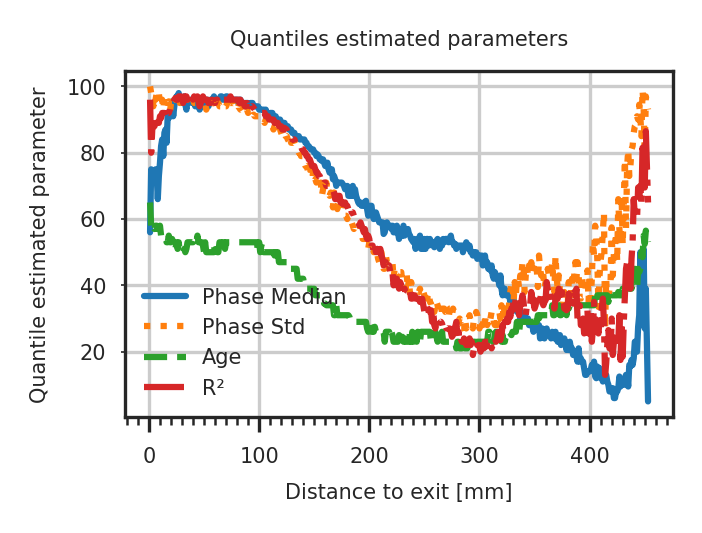

In [69]:
sns.set_style("ticks")
matplotlib.rcParams.update({'font.size': 5, 'ytick.major.size': 1,
                                'ytick.major.width': 0.4, 'font.sans-serif': 'Arial'})

# A
fig, ax = plt.subplots(1, 1, figsize=(2.356, 1.5), dpi=300)
sns.lineplot(dist, x="entrance_dist_focal_median_round", y="phase_focal_q", ax=ax, estimator="median", errorbar=None,
             label="Phase Median", linestyle="solid")
sns.lineplot(dist, x="entrance_dist_focal_median_round", y="phase_focal_std_q", ax=ax, estimator="median",
             errorbar=None,
             label="Phase Std", linestyle="dotted")
sns.lineplot(dist, x="entrance_dist_focal_median_round", y="age_focal_q", ax=ax, estimator="median", errorbar=None,
             label="Age", linestyle="dashed")
sns.lineplot(dist, x="entrance_dist_focal_median_round", y="r_squared_focal_q", ax=ax, estimator="median",
             errorbar=None, label="R²", linestyle="dashdot")
ax.set_xlabel("Distance to exit [mm]")
ax.set_ylabel("Quantile estimated parameter")
ax.xaxis.set_minor_locator(ticker.MultipleLocator(10))
ax.tick_params(which='minor', length=2)
ax.grid(visible=True)
ax.legend(frameon=False, loc='lower left')#bbox_to_anchor=(1.008, 1.), loc='upper left', borderaxespad=0., title="Estimated Parameters")
ax.set_title("Quantiles estimated parameters", fontsize=rcParams['axes.labelsize'])
plt.savefig("plot_1_d.svg")

Text(0.5, 1.0, 'Quantiles estimated parameters')

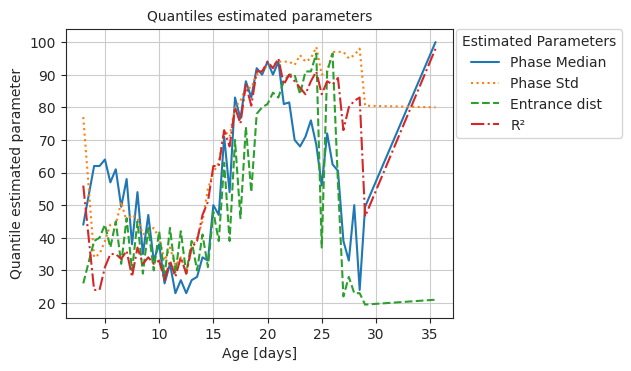

In [22]:
sns.set_style("ticks")
fig, ax = plt.subplots(1, 1, figsize=(5, 3.75))
sns.lineplot(dist, x="age_focal_median", y="phase_focal_q", ax=ax, estimator="median", errorbar=None,
             label="Phase Median", linestyle="solid")
sns.lineplot(dist, x="age_focal_median", y="phase_focal_std_q", ax=ax, estimator="median",
             errorbar=None,
             label="Phase Std", linestyle="dotted")
sns.lineplot(dist, x="age_focal_median", y="dist_focal_q", ax=ax, estimator="median", errorbar=None,
             label="Entrance dist", linestyle="dashed")
sns.lineplot(dist, x="age_focal_median", y="r_squared_focal_q", ax=ax, estimator="median",
             errorbar=None, label="R²", linestyle="dashdot")
ax.set_xlabel("Age [days]")
ax.set_ylabel("Quantile estimated parameter")
ax.xaxis.set_minor_locator(ticker.MultipleLocator(10))
ax.tick_params(which='minor', length=2)
ax.grid(visible=True)
ax.legend(bbox_to_anchor=(1.008, 1.), loc='upper left', borderaxespad=0., title="Estimated Parameters")
ax.set_title("Quantiles estimated parameters", fontsize=rcParams['axes.labelsize'])

In [ ]:
dist = pd.read_pickle("../../plots/pivot_dist_plot.pkl")
dist.columns = dist.columns.map(lambda x: x[0] + "_" + x[1] if len(x[1]) > 0 else x[0])
dist["x_pos_start_focal"] = dist["x_pos_start_focal"].round()
dist["y_pos_start_focal"] = dist["y_pos_start_focal"].round()
pivot = dist.groupby(["y_pos_start_focal", "x_pos_start_focal"])["entrance_dist_focal"].median().unstack(-1)
fig, ax= plt.subplots(1,1, figsize=(10, 5))
cmap = sns.color_palette("Greys", len(pd.qcut(dist["entrance_dist_focal"], 5).unique()))
sns.heatmap(data=pivot, ax=ax, cmap=cmap, alpha=0.5)

In [ ]:
from bb_rhythm import statistics
import numpy as np
dist["phase_focal_median_sqrt"] = np.sqrt(dist["phase_focal_median"])
statistics.calculate_regression(dist, "r_squared_focal_median", "phase_focal_median")
statistics.calculate_regression(dist, "r_squared_focal_median", "phase_focal_q")
statistics.calculate_regression(dist, "r_squared_focal_median", "phase_focal_median_sqrt")

# Networks

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
import bb_rhythm.utils

In [17]:
def plot_heatmap_centrality(data, x=None, y="hour_start", centrality=None, ax=None, aggfunc='median', **kws):
    pivot = data.dropna().pivot_table(index=x, columns=y, values=centrality, aggfunc=aggfunc)
    if not ax:
        ax = plt.gca()
    sns.heatmap(pivot, **kws, ax=ax, cmap="viridis")
    ax.set_yticklabels(sorted(data[x].unique()))

## 2019

In [19]:
path = "../data/dataframes/social_network_2019_hour_centrality.pkl"#"../data/dataframes/social_network_hour_centralities.pkl"
social_network_centralities = pd.read_pickle(path)
social_network_centralities["phase_round"] = social_network_centralities["phase"].round(1)
social_network_centralities["r_squared_round"] = social_network_centralities["r_squared"].round(2)
social_network_centralities

,bee_id,eigenvector_centrality,degree_centrality,betweeness_centrality,age,phase,r_squared,date,hour_start,hour_end,phase_round,r_squared_round
0,642.0,6.654085e-43,0.000997,0.000000,41.0,11.533466,0.579431,2019-08-20 00:00:00+00:00,6.0,7.0,11.5,0.58
1,2195.0,1.176946e-15,0.009970,0.004756,23.0,13.631092,0.711374,2019-08-20 00:00:00+00:00,6.0,7.0,13.6,0.71
2,664.0,9.819696e-23,0.001994,0.000000,42.0,10.250773,0.495210,2019-08-20 00:00:00+00:00,6.0,7.0,10.3,0.50
3,3938.0,9.819696e-23,0.001994,0.000000,7.0,12.267786,0.120585,2019-08-20 00:00:00+00:00,6.0,7.0,12.3,0.12
4,676.0,6.654085e-43,0.000997,0.000000,35.0,10.463803,0.136257,2019-08-20 00:00:00+00:00,6.0,7.0,10.5,0.14
...,...,...,...,...,...,...,...,...,...,...,...,...
1060,2280.0,1.258559e-38,0.000940,0.000000,23.0,13.132405,0.388482,2019-09-13 00:00:00+00:00,19.0,20.0,13.1,0.39
1061,4476.0,1.258559e-38,0.000940,0.000000,0.0,NaN,NaN,2019-09-13 00:00:00+00:00,19.0,20.0,NaN,NaN
1062,4348.0,2.207998e-40,0.003759,0.000000,1.0,13.018027,0.081737,2019-09-13 00:00:00+00:00,19.0,20.0,13.0,0.08
1063,2544.0,1.258559e-38,0.000940,0.000000,22.0,11.790926,0.517150,2019-09-13 00:00:00+00:00,19.0,20.0,11.8,0.52


In [2]:
path = "../data/dataframes/social_network_hour_centralities_focal_weight.pkl"
social_network_centralities_focal_w = pd.read_pickle(path)
social_network_centralities_focal_w["phase_round"] = social_network_centralities_focal_w["phase"].round(1)
social_network_centralities_focal_w["r_squared_round"] = social_network_centralities_focal_w["r_squared"].round(2)
social_network_centralities_focal_w

,bee_id,eigenvector_centrality,degree_centrality,betweeness_centrality,age,phase,r_squared,date,hour_start,hour_end,phase_round,r_squared_round
0,642.0,2.228283e-16,0.001300,0.000000,41.0,11.533466,0.579431,2019-08-20 00:00:00+00:00,6.0,7.0,11.5,0.58
1,2195.0,3.592949e-13,0.007802,0.000036,23.0,13.631092,0.711374,2019-08-20 00:00:00+00:00,6.0,7.0,13.6,0.71
2,676.0,-5.334428e-16,0.001300,0.000000,35.0,10.463803,0.136257,2019-08-20 00:00:00+00:00,6.0,7.0,10.5,0.14
3,3033.0,-4.276678e-14,0.001300,0.000000,16.0,13.902869,0.126227,2019-08-20 00:00:00+00:00,6.0,7.0,13.9,0.13
4,944.0,7.149509e-17,0.001300,0.000000,32.0,10.582355,0.329118,2019-08-20 00:00:00+00:00,6.0,7.0,10.6,0.33
...,...,...,...,...,...,...,...,...,...,...,...,...
846,4330.0,-6.007827e-19,0.001176,0.000000,1.0,10.056799,0.180396,2019-09-13 00:00:00+00:00,19.0,20.0,10.1,0.18
847,4345.0,-4.570486e-18,0.001176,0.000000,1.0,10.026702,0.181971,2019-09-13 00:00:00+00:00,19.0,20.0,10.0,0.18
848,4348.0,-9.088722e-19,0.003529,0.000000,1.0,13.018027,0.081737,2019-09-13 00:00:00+00:00,19.0,20.0,13.0,0.08
849,2544.0,-1.008790e-18,0.001176,0.000000,22.0,11.790926,0.517150,2019-09-13 00:00:00+00:00,19.0,20.0,11.8,0.52


In [20]:
binning = bb_rhythm.utils.Binning(bin_name="Phase [h]", bin_parameter="phase")
social_network_centralities = binning.add_bins_to_df(
    social_network_centralities,
    n_bins=12,
    step_size=None, 
)

In [13]:
binning = bb_rhythm.utils.Binning(bin_name="Phase [h]", bin_parameter="phase")
social_network_centralities_focal_w = binning.add_bins_to_df(
    social_network_centralities_focal_w,
    n_bins=12,
    step_size=None, 
)

In [21]:
binning = bb_rhythm.utils.Binning(bin_name="R²", bin_parameter="r_squared")
social_network_centralities = binning.add_bins_to_df(
    social_network_centralities,
    n_bins=12,
    step_size=None,
)

In [5]:
binning = bb_rhythm.utils.Binning(bin_name="R²", bin_parameter="r_squared")
social_network_centralities_focal_w = binning.add_bins_to_df(
    social_network_centralities_focal_w,
    n_bins=12,
    step_size=None,
)

In [22]:
binning = bb_rhythm.utils.Binning(bin_name="Age", bin_parameter="age")
social_network_centralities = binning.add_bins_to_df(
    social_network_centralities,
    n_bins=12,
    step_size=None,
)

In [6]:
binning = bb_rhythm.utils.Binning(bin_name="Age", bin_parameter="age")
social_network_centralities_focal_w = binning.add_bins_to_df(
    social_network_centralities_focal_w,
    n_bins=12,
    step_size=None,
)

In [42]:
social_network_centralities

,bee_id,eigenvector_centrality,degree_centrality,betweeness_centrality,age,phase,r_squared,date,hour_start,hour_end,phase_round,r_squared_round,Phase [h],R²,Age
1,2499.0,5.900308e-16,0.001936,0.000000,16.0,13.095679,0.336624,2019-08-20 00:00:00+00:00,6.0,7.0,13.1,0.34,"(12.62, 13.12]","(0.29, 0.36]",16+
2,3410.0,4.499335e-04,0.002904,0.000408,6.0,13.864072,0.192794,2019-08-20 00:00:00+00:00,6.0,7.0,13.9,0.19,"(13.57, 14.12]","(0.17, 0.2]",03+
3,642.0,5.511202e-46,0.000968,0.000000,41.0,11.533466,0.579431,2019-08-20 00:00:00+00:00,6.0,7.0,11.5,0.58,"(11.11, 11.68]","(0.56, 0.83]",28+
4,2195.0,8.567843e-17,0.009681,0.004393,23.0,13.631092,0.711374,2019-08-20 00:00:00+00:00,6.0,7.0,13.6,0.71,"(13.57, 14.12]","(0.56, 0.83]",23+
5,664.0,2.602591e-24,0.001936,0.000000,42.0,10.250773,0.495210,2019-08-20 00:00:00+00:00,6.0,7.0,10.3,0.50,"(10.21, 11.11]","(0.45, 0.56]",28+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1068,4348.0,2.153082e-40,0.003670,0.000000,1.0,13.018027,0.081737,2019-09-13 00:00:00+00:00,19.0,20.0,13.0,0.08,"(12.62, 13.12]","(0.08, 0.11]",01+
1069,2544.0,1.227257e-38,0.000917,0.000000,22.0,11.790926,0.517150,2019-09-13 00:00:00+00:00,19.0,20.0,11.8,0.52,"(11.68, 12.16]","(0.45, 0.56]",22+
1070,2719.0,1.227257e-38,0.000917,0.000000,20.0,12.880498,0.310710,2019-09-13 00:00:00+00:00,19.0,20.0,12.9,0.31,"(12.62, 13.12]","(0.29, 0.36]",18+
1075,3929.0,2.432983e-38,0.001835,0.000000,8.0,14.617817,0.053578,2019-09-13 00:00:00+00:00,19.0,20.0,14.6,0.05,"(14.12, 14.86]","(0.04, 0.08]",07+


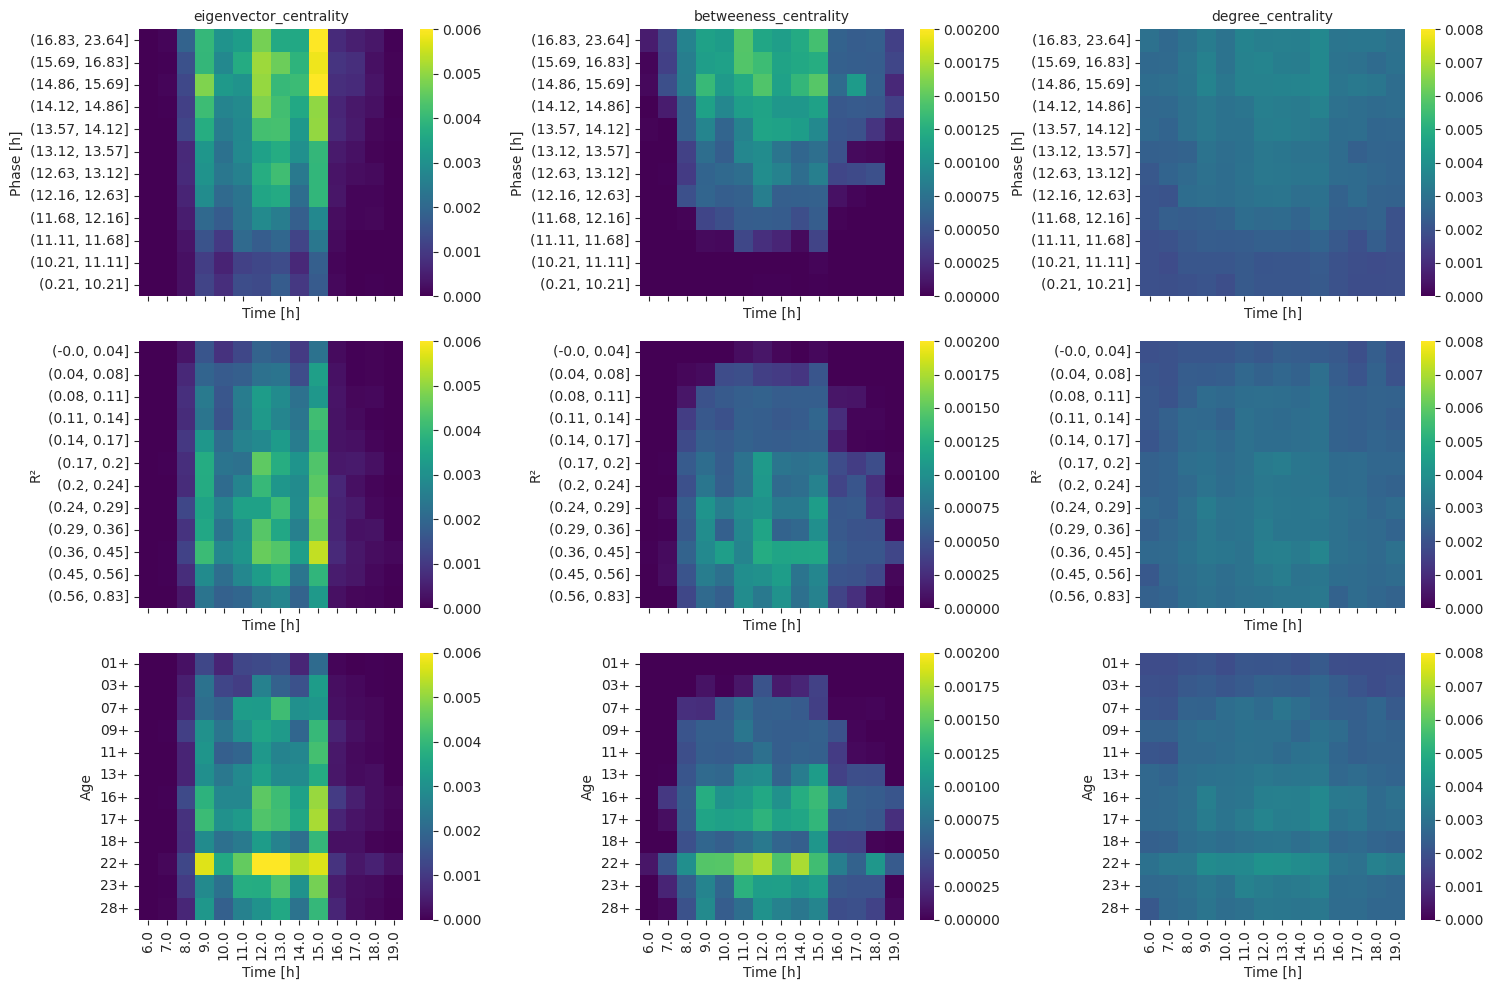

In [23]:
from matplotlib import rcParams
vmin_vmax_dict = {"eigenvector_centrality": (0, 0.006), "betweeness_centrality": (0, 0.002), "degree_centrality": (0, 0.008)}
i = 0
j = 0
fig, ax = plt.subplots(3, 3, figsize=(15, 10), sharex=True)
for x in ["Phase [h]", "R²", "Age"]:
    for centrality in ["eigenvector_centrality", "betweeness_centrality", "degree_centrality"]:
        plot_heatmap_centrality(social_network_centralities, x=x, y="hour_start", centrality=centrality, vmin=vmin_vmax_dict[centrality][0], vmax=vmin_vmax_dict[centrality][1], ax=ax[i, j])
        if i == 0:
            ax[i, j].set_title(centrality, fontsize=rcParams['axes.labelsize'])
        ax[i, j].set_xlabel('Time [h]')
        if x == "Phase [h]":
            ax[i, j].invert_yaxis()
        j += 1
    i += 1
    j = 0

plt.tight_layout()
plt.show()

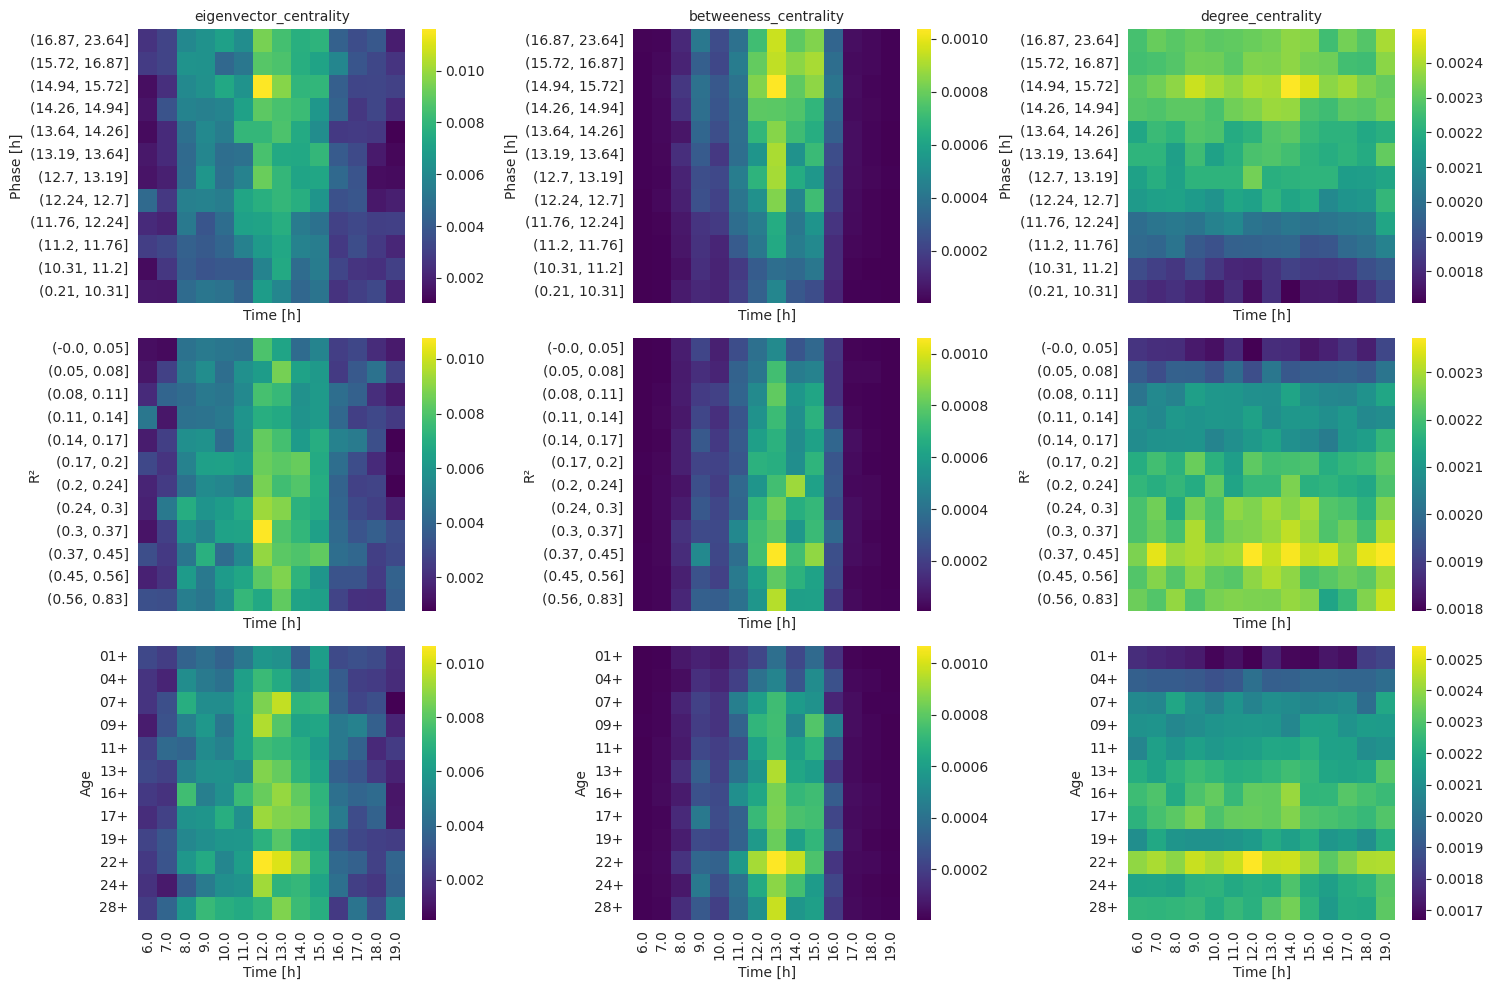

In [33]:
vmin_vmax_dict = {"eigenvector_centrality": (social_network_centralities_focal_w.eigenvector_centrality.quantile(0.1), social_network_centralities_focal_w.eigenvector_centrality.quantile(0.9)), "betweeness_centrality": (-0.0025, 0.0025), "degree_centrality": (social_network_centralities_focal_w.degree_centrality.quantile(0.05), social_network_centralities_focal_w.degree_centrality.quantile(0.95))}
i = 0
j = 0
fig, ax = plt.subplots(3, 3, figsize=(15, 10), sharex=True)
for x in ["Phase [h]", "R²", "Age"]:
    for centrality in ["eigenvector_centrality", "betweeness_centrality", "degree_centrality"]:
        plot_heatmap_centrality(social_network_centralities_focal_w, x=x, y="hour_start", centrality=centrality, aggfunc="mean",# vmin=vmin_vmax_dict[centrality][0], vmax=vmin_vmax_dict[centrality][1],
        ax=ax[i, j])
        if i == 0:
            ax[i, j].set_title(centrality, fontsize=rcParams['axes.labelsize'])
        ax[i, j].set_xlabel('Time [h]')
        if x == "Phase [h]":
            ax[i, j].invert_yaxis()
        j += 1
    i += 1
    j = 0

plt.tight_layout()
plt.show()

## 2016

In [21]:
path = "../data/dataframes/social_network_hour_centralities_side2.pkl"
social_network_centralities = pd.read_pickle(path)
social_network_centralities["phase_round"] = social_network_centralities["phase"].round(1)
social_network_centralities["r_squared_round"] = social_network_centralities["r_squared"].round(2)
social_network_centralities

,bee_id,eigenvector_centrality,degree_centrality,betweeness_centrality,age,phase,r_squared,date,hour_start,hour_end,phase_round,r_squared_round
0,49.0,NaN,0.001821,0.000000,34.0,11.906346,0.361159,2016-08-01 00:00:00+00:00,6.0,7.0,11.9,0.36
1,1949.0,NaN,0.027322,0.010041,6.0,12.802996,0.353859,2016-08-01 00:00:00+00:00,6.0,7.0,12.8,0.35
2,135.0,NaN,0.010929,0.020233,33.0,13.120218,0.603006,2016-08-01 00:00:00+00:00,6.0,7.0,13.1,0.60
3,958.0,NaN,0.014572,0.029898,25.0,11.656142,0.247927,2016-08-01 00:00:00+00:00,6.0,7.0,11.7,0.25
4,1274.0,NaN,0.005464,0.020169,18.0,14.485819,0.208334,2016-08-01 00:00:00+00:00,6.0,7.0,14.5,0.21
...,...,...,...,...,...,...,...,...,...,...,...,...
386,1716.0,1.061441e-40,0.002564,0.000000,11.0,9.073089,0.007005,2016-08-25 00:00:00+00:00,19.0,20.0,9.1,0.01
387,2538.0,1.608244e-42,0.002564,0.000000,1.0,19.090040,0.035270,2016-08-25 00:00:00+00:00,19.0,20.0,19.1,0.04
388,2541.0,1.608244e-42,0.002564,0.000000,1.0,8.524279,0.047484,2016-08-25 00:00:00+00:00,19.0,20.0,8.5,0.05
389,2190.0,1.061441e-40,0.002564,0.000000,5.0,6.184322,0.033659,2016-08-25 00:00:00+00:00,19.0,20.0,6.2,0.03


In [22]:
binning = bb_rhythm.utils.Binning(bin_name="Phase [h]", bin_parameter="phase")
social_network_centralities = binning.add_bins_to_df(
    social_network_centralities,
    n_bins=12,
    step_size=None,
    label_type=pd.Interval,
)
binning = bb_rhythm.utils.Binning(bin_name="Age", bin_parameter="age")
social_network_centralities = binning.add_bins_to_df(
    social_network_centralities,
    n_bins=12,
    step_size=None,
)
binning = bb_rhythm.utils.Binning(bin_name="R²", bin_parameter="r_squared")
social_network_centralities = binning.add_bins_to_df(
    social_network_centralities,
    n_bins=12,
    step_size=None,
)

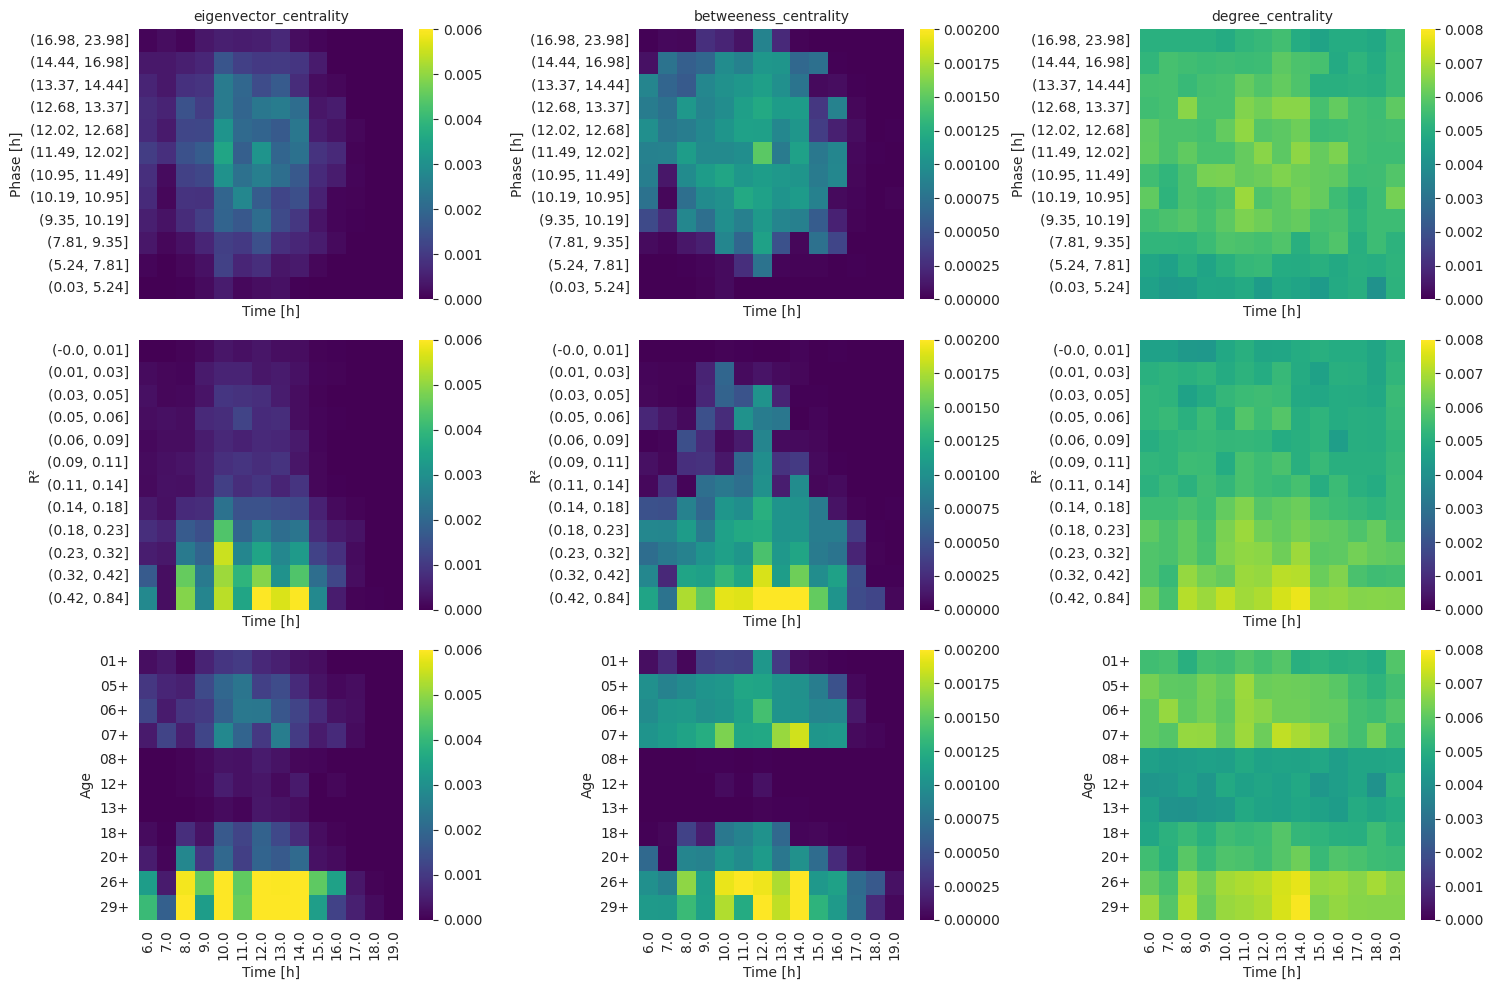

In [23]:
vmin_vmax_dict = {"eigenvector_centrality": (0, 0.006), "betweeness_centrality": (0, 0.002), "degree_centrality": (0, 0.008)}
i = 0
j = 0
fig, ax = plt.subplots(3, 3, figsize=(15, 10), sharex=True)
for x in ["Phase [h]", "R²", "Age"]:
    for centrality in ["eigenvector_centrality", "betweeness_centrality", "degree_centrality"]:
        plot_heatmap_centrality(social_network_centralities, x=x, y="hour_start", centrality=centrality, vmin=vmin_vmax_dict[centrality][0], vmax=vmin_vmax_dict[centrality][1], ax=ax[i, j])
        if i == 0:
            ax[i, j].set_title(centrality, fontsize=rcParams['axes.labelsize'])
        ax[i, j].set_xlabel('Time [h]')
        if x == "Phase [h]":
            ax[i, j].invert_yaxis()
        j += 1
    i += 1
    j = 0

plt.tight_layout()
plt.show()

In [6]:
path = "../data/dataframes/social_network_hour_centralities_side2_focal_weight.pkl"
social_network_centralities_focal_w = pd.read_pickle(path)
social_network_centralities_focal_w["phase_round"] = social_network_centralities_focal_w["phase"].round(1)
social_network_centralities_focal_w["r_squared_round"] = social_network_centralities_focal_w["r_squared"].round(2)
social_network_centralities_focal_w

,bee_id,eigenvector_centrality,degree_centrality,betweeness_centrality,age,phase,r_squared,date,hour_start,hour_end,phase_round,r_squared_round
0,135.0,2.712949e-01,0.014851,0.000473,33.0,13.120218,0.603006,2016-08-01 00:00:00+00:00,6.0,7.0,13.1,0.60
1,958.0,2.712949e-01,0.007426,0.000172,25.0,11.656142,0.247927,2016-08-01 00:00:00+00:00,6.0,7.0,11.7,0.25
2,1274.0,2.712949e-01,0.002475,0.000000,18.0,14.485819,0.208334,2016-08-01 00:00:00+00:00,6.0,7.0,14.5,0.21
3,1375.0,2.712949e-01,0.002475,0.000000,17.0,15.934137,0.164555,2016-08-01 00:00:00+00:00,6.0,7.0,15.9,0.16
4,2040.0,2.712949e-01,0.009901,0.000000,6.0,8.752276,0.139922,2016-08-01 00:00:00+00:00,6.0,7.0,8.8,0.14
...,...,...,...,...,...,...,...,...,...,...,...,...
267,2155.0,3.257330e-08,0.003690,0.000000,6.0,13.119152,0.222186,2016-08-25 00:00:00+00:00,19.0,20.0,13.1,0.22
268,2538.0,1.123217e-09,0.003690,0.000000,1.0,19.090040,0.035270,2016-08-25 00:00:00+00:00,19.0,20.0,19.1,0.04
269,2507.0,3.257330e-08,0.003690,0.000000,1.0,3.843588,0.009189,2016-08-25 00:00:00+00:00,19.0,20.0,3.8,0.01
270,2547.0,1.123217e-09,0.003690,0.000000,1.0,6.701923,0.011381,2016-08-25 00:00:00+00:00,19.0,20.0,6.7,0.01


In [7]:
binning = bb_rhythm.utils.Binning(bin_name="Phase [h]", bin_parameter="phase")
social_network_centralities_focal_w = binning.add_bins_to_df(
    social_network_centralities_focal_w,
    n_bins=12,
    step_size=None,
    label_type=pd.Interval,
)
binning = bb_rhythm.utils.Binning(bin_name="R²", bin_parameter="r_squared")
social_network_centralities_focal_w = binning.add_bins_to_df(
    social_network_centralities_focal_w,
    n_bins=12,
    step_size=None,
)
binning = bb_rhythm.utils.Binning(bin_name="Age", bin_parameter="age")
social_network_centralities_focal_w = binning.add_bins_to_df(
    social_network_centralities_focal_w,
    n_bins=12,
    step_size=None,
)

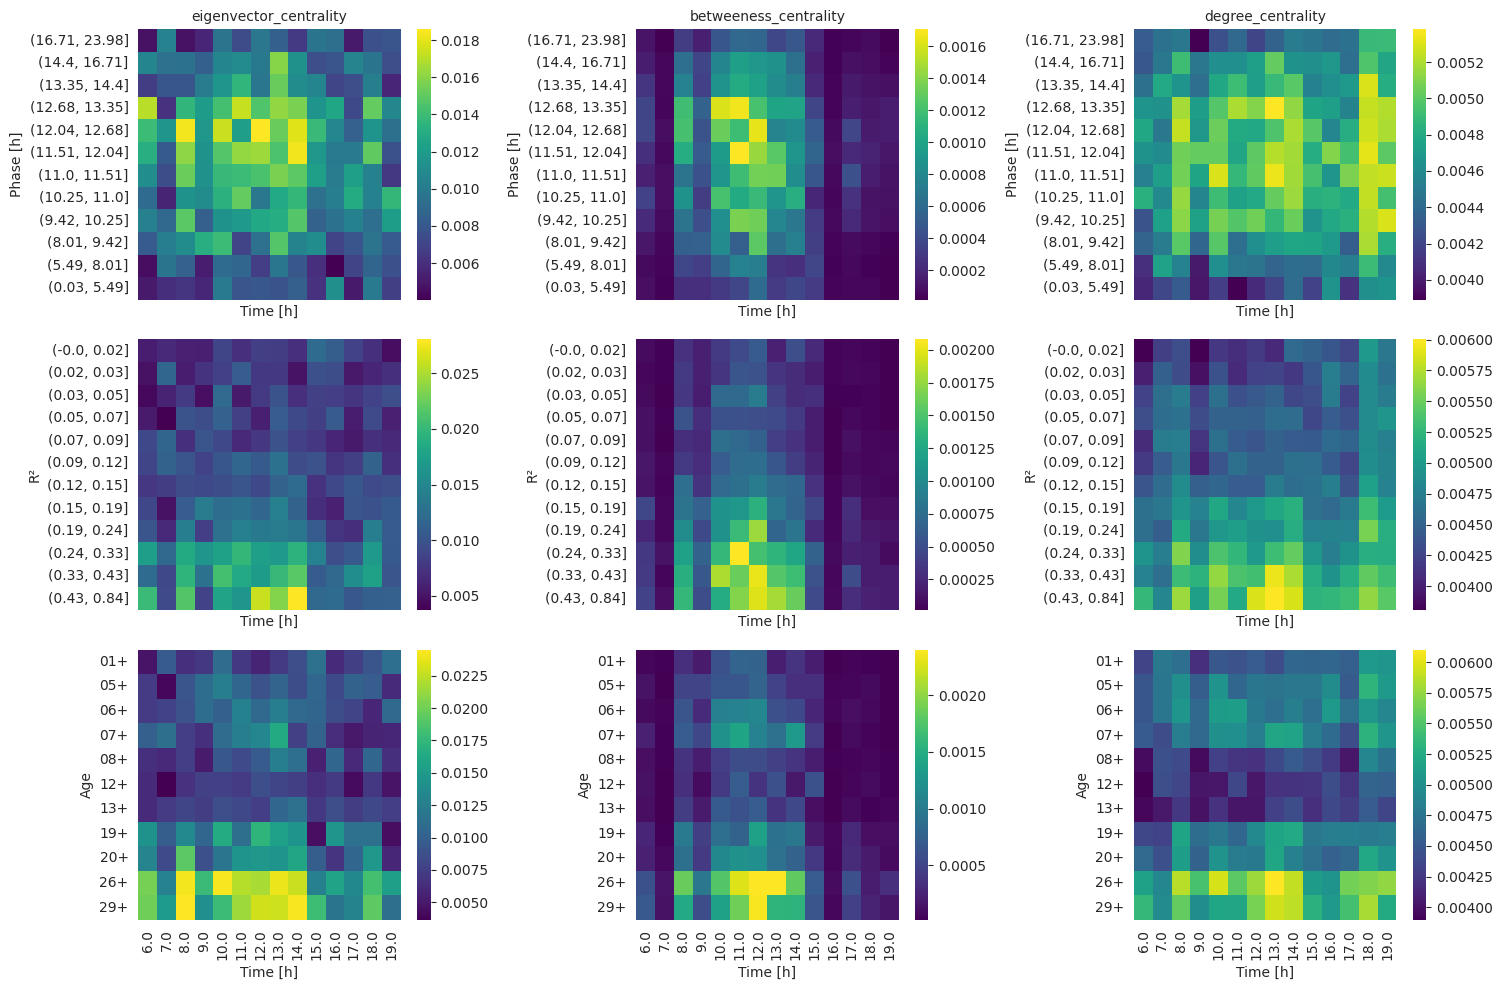

In [8]:
vmin_vmax_dict = {"eigenvector_centrality": (social_network_centralities_focal_w.eigenvector_centrality.quantile(0.1), social_network_centralities_focal_w.eigenvector_centrality.quantile(0.9)), "betweeness_centrality": (-0.0025, 0.0025), "degree_centrality": (social_network_centralities_focal_w.degree_centrality.quantile(0.05), social_network_centralities_focal_w.degree_centrality.quantile(0.95))}
i = 0
j = 0
fig, ax = plt.subplots(3, 3, figsize=(15, 10), sharex=True)
for x in ["Phase [h]", "R²", "Age"]:
    for centrality in ["eigenvector_centrality", "betweeness_centrality", "degree_centrality"]:
        plot_heatmap_centrality(social_network_centralities_focal_w, x=x, y="hour_start", centrality=centrality, aggfunc="mean",# vmin=vmin_vmax_dict[centrality][0], vmax=vmin_vmax_dict[centrality][1],
        ax=ax[i, j])
        if i == 0:
            ax[i, j].set_title(centrality, fontsize=rcParams['axes.labelsize'])
        ax[i, j].set_xlabel('Time [h]')
        if x == "Phase [h]":
            ax[i, j].invert_yaxis()
        j += 1
    i += 1
    j = 0

plt.tight_layout()
plt.show()